In [1]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
import os
import cv2
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf

D:\I_S\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
!pip install visualkeras

     -------------------------------------- 43.2/43.2 kB 531.6 kB/s eta 0:00:00


In [5]:
import visualkeras

#### First step is to create a picture from the audio file

In [7]:
#list the files
filelist = os.listdir('males')
male_voices =[]
for i in filelist:
    male_voices.append(os.path.join("males",i))
#read them into pandas
df_male = pd.DataFrame(male_voices)

In [8]:
# Adding the 1 label to the dataframe representing male
df_male['label']='1'

In [9]:
# Renaming the column name to file
df_male = df_male.rename(columns={0:'file'})

In [10]:
df_male.head()

,file,label
0,males/3308.wav,1
1,males/862.wav,1
2,males/1710.wav,1
3,males/3558.wav,1
4,males/362.wav,1


In [11]:
df_male.shape

(3682, 2)

In [12]:
filelist = os.listdir('females')
female_voices =[]
for i in filelist:
    female_voices.append(os.path.join("females",i))
#read them into pandas
df_female = pd.DataFrame(female_voices)

In [13]:
df_female['label']='0'

In [14]:
df_female = df_female.rename(columns={0:'file'})

In [15]:
df_female.head()

,file,label
0,females/862.wav,0
1,females/1710.wav,0
2,females/362.wav,0
3,females/1636.wav,0
4,females/677.wav,0


In [16]:
df_female.shape

(2311, 2)

In [74]:
df = pd.concat([df_female, df_male], ignore_index=True)

In [75]:
df.head()

,file,label
0,females\0.wav,0
1,females\1.wav,0
2,females\10.wav,0
3,females\100.wav,0
4,females\1000.wav,0


In [76]:
# Randomizing our files to be able to split into train, validation and test
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [77]:
df.shape

(5993, 2)

In [78]:
df_train , df_test = train_test_split(df, test_size=(0.2))

In [79]:
print(df_train.shape)
print(df_test.shape)

(4794, 2)
(1199, 2)


In [1]:
4794+1199

5993

In [80]:
df_train['label'].value_counts(normalize=True)

1    0.612224
0    0.387776
Name: label, dtype: float64

In [81]:
df_test['label'].value_counts(normalize=True)

1    0.623019
0    0.376981
Name: label, dtype: float64

In [82]:
df_train.head()

,file,label
2488,females\1979.wav,0
3403,males\935.wav,1
5636,males\1912.wav,1
4488,females\777.wav,0
2881,males\695.wav,1


#### Visualizing the melspectrogram (We will explain soon how to create this images)

In [83]:
# Randomly choosing one of the audio files
filename = "females\\56.wav"

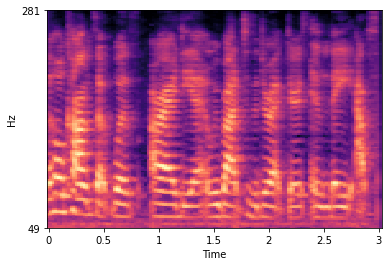

In [84]:
# Checking how the image looks like with the frequency restriction
X, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
plt.show()

Using a function to generate and save the melspectrogram for each audio file

In [89]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 18 (sources in the READ.ME)

def images(files):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join(os.path.abspath(str(files.file)))
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    # Setting min and max frequency to account for human voice frequency
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = files.file
    name1 = str(name).replace(".wav","")
    file  =  os.path.join('test_images',(name1)+'.jpg')
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

Now we load the dataframe and slice the data into train, validation and testing data like before. Again, 3435 for training, 1000 for validation and 1000 for testing.

In [86]:
train = df_train
val = df_test
test = df_test

We use the function to create all the images from train, val and test

In [88]:
train.apply(images, axis=1);

In [90]:
test.apply(images, axis=1);

In [91]:
plt.close('all')

In [92]:
# Code to let us know when the code finishes running
os.system('say -v Juan ya acabé');

We will use the datagen.flow_from_dataframe from the keras documentation to use with the CNN
https://keras.io/preprocessing/image/

![keras](img/keras.jpg)

 <h1>NEW DATASET with Third Class Representing Noise For finding distance</h1>

<h1>Loading Generated Spectograms of wav files</h1>

<h1>Loading trainning images</h1>

In [4]:
train_males = os.listdir("train_images/males")
train_male_voices_images=[]
for image in train_males:
    train_male_voices_images.append(os.path.join("train_images/males",image))
train_male_voices_images[:5]

['train_images/males/00004 (61).jpg',
 'train_images/males/2789.jpg',
 'train_images/males/00042 (4).jpg',
 'train_images/males/sample-002725.jpg',
 'train_images/males/383.jpg']

In [5]:
len(train_male_voices_images)

6292

In [6]:
train_males_df = pd.DataFrame(train_male_voices_images)
train_males_df.columns = ['Image']
train_males_df['Label']="M"
train_males_df.head()

,Image,Label
0,train_images/males/00004 (61).jpg,M
1,train_images/males/2789.jpg,M
2,train_images/males/00042 (4).jpg,M
3,train_images/males/sample-002725.jpg,M
4,train_images/males/383.jpg,M


In [7]:
train_females = os.listdir("train_images/females")
train_female_voices_images=[]
for image in train_females:
    train_female_voices_images.append(os.path.join("train_images/females",image))
train_female_voices_images[:5]

['train_images/females/00004 (61).jpg',
 'train_images/females/383.jpg',
 'train_images/females/00033 (10).jpg',
 'train_images/females/00026 (12).jpg',
 'train_images/females/00018 (22).jpg']

In [8]:
train_females_df = pd.DataFrame(train_female_voices_images)
train_females_df.columns = ['Image']
train_females_df['Label']="F"
train_females_df.head()

,Image,Label
0,train_images/females/00004 (61).jpg,F
1,train_images/females/383.jpg,F
2,train_images/females/00033 (10).jpg,F
3,train_images/females/00026 (12).jpg,F
4,train_images/females/00018 (22).jpg,F


In [9]:
train_noise = os.listdir("train_images/noise")
train_noise_voices_images=[]
for image in train_noise:
    train_noise_voices_images.append(os.path.join("train_images/noise",image))
train_noise_voices_images[:5]

['train_images/noise/54898-8-0-8.jpg',
 'train_images/noise/47926-3-1-0.jpg',
 'train_images/noise/49769-5-0-0.jpg',
 'train_images/noise/149177-6-0-0.jpg',
 'train_images/noise/103199-4-2-5.jpg']

In [10]:
train_noise_df = pd.DataFrame(train_noise_voices_images)
train_noise_df.columns = ['Image']
train_noise_df['Label']="N"
train_noise_df.head()

,Image,Label
0,train_images/noise/54898-8-0-8.jpg,N
1,train_images/noise/47926-3-1-0.jpg,N
2,train_images/noise/49769-5-0-0.jpg,N
3,train_images/noise/149177-6-0-0.jpg,N
4,train_images/noise/103199-4-2-5.jpg,N


In [11]:
train_data = pd.concat([train_males_df, train_females_df, train_noise_df], axis=0)
train_data = train_data.sample(frac=1,  random_state=42).reset_index(drop=True)
train_data.tail()

,Image,Label
13866,train_images/males/sample-003203.jpg,M
13867,train_images/noise/135526-6-0-0.jpg,N
13868,train_images/males/sample-000716.jpg,M
13869,train_images/males/sample-003786.jpg,M
13870,train_images/females/397.jpg,F


<h1>Loading Testing images</h1>


In [12]:
test_males = os.listdir("test_images/males")
test_male_voices_images=[]
for image in test_males:
    test_male_voices_images.append(os.path.join("test_images/males",image))
test_male_voices_images[:5]

['test_images/males/3055.jpg',
 'test_images/males/1110.jpg',
 'test_images/males/3371.jpg',
 'test_images/males/147.jpg',
 'test_images/males/504.jpg']

In [13]:
test_females = os.listdir("test_images/females")
test_female_voices_images=[]
for image in test_females:
    test_female_voices_images.append(os.path.join("test_images/females",image))
test_female_voices_images[:5]

['test_images/females/1872.jpg',
 'test_images/females/147.jpg',
 'test_images/females/1716.jpg',
 'test_images/females/504.jpg',
 'test_images/females/202.jpg']

In [14]:
test_females_df = pd.DataFrame(test_female_voices_images)
test_females_df.columns = ['Image']
test_females_df['Label']="F"
test_females_df.head()

,Image,Label
0,test_images/females/1872.jpg,F
1,test_images/females/147.jpg,F
2,test_images/females/1716.jpg,F
3,test_images/females/504.jpg,F
4,test_images/females/202.jpg,F


In [15]:
test_males_df = pd.DataFrame(test_male_voices_images)
test_males_df.columns = ['Image']
test_males_df['Label']="M"
test_males_df.head()

,Image,Label
0,test_images/males/3055.jpg,M
1,test_images/males/1110.jpg,M
2,test_images/males/3371.jpg,M
3,test_images/males/147.jpg,M
4,test_images/males/504.jpg,M


In [16]:
test_noise = os.listdir("test_images/noise")
test_noise_voices_images=[]
for image in test_noise:
    test_noise_voices_images.append(os.path.join("test_images/noise",image))
test_noise_voices_images[:5]

['test_images/noise/44325-9-0-72.jpg',
 'test_images/noise/111671-8-0-2.jpg',
 'test_images/noise/161922-3-1-4.jpg',
 'test_images/noise/46299-2-0-36.jpg',
 'test_images/noise/49312-2-0-1.jpg']

In [17]:
test_noise_df = pd.DataFrame(test_noise_voices_images)
test_noise_df.columns = ['Image']
test_noise_df['Label']="N"
test_noise_df.head()

,Image,Label
0,test_images/noise/44325-9-0-72.jpg,N
1,test_images/noise/111671-8-0-2.jpg,N
2,test_images/noise/161922-3-1-4.jpg,N
3,test_images/noise/46299-2-0-36.jpg,N
4,test_images/noise/49312-2-0-1.jpg,N


In [18]:
test_data = pd.concat([test_males_df, test_females_df, test_noise_df], axis=0)
test_data = test_data.sample(frac=1,  random_state=42).reset_index(drop=True)
test_data.head()

,Image,Label
0,test_images/noise/191382-3-1-0.jpg,N
1,test_images/noise/65381-3-0-6.jpg,N
2,test_images/females/1717.jpg,F
3,test_images/noise/23219-5-0-6.jpg,N
4,test_images/noise/35548-9-2-9.jpg,N


In [19]:
def to_gray(img):
    return tf.image.rgb_to_grayscale(img)


def tf_binarize(img):
    return tf.cast(tf.greater(img, 0.5), tf.float32)


def pre_gen_binarize(img):
    img = img[:, :, 0]
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    binary_img = binary_img.reshape(binary_img.shape[0], binary_img.shape[1], 1)
    return binary_img // 255

(377, 387, 3)


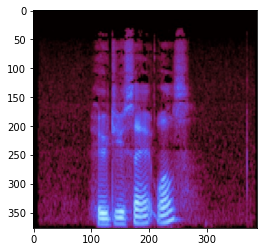

In [20]:
img = cv2.imread(train_data['Image'][0])
plt.imshow(img)
print(img.shape)

In [21]:
num_epochs = 10
batch_size = 1024
validation_ratio = 0.1

h = 64
w = 64
c = 1
image_dim = (h,w,c)

In [22]:
class Generators:
    def __init__(self, train_df, test_df):
        self.batch_size=batch_size
        self.img_size=(h,w)

        _train_datagen = ImageDataGenerator(
            #rescale=1/255,
            rotation_range=30,
            zoom_range = 0.2,
            width_shift_range=0.2,
            height_shift_range=0.2,
            fill_mode='nearest',
            preprocessing_function=pre_gen_binarize
        )
        self.train_generator = _train_datagen.flow_from_dataframe(
            dataframe=train_df,
            x_col="Image",
            y_col="Label",
            class_mode='categorical',
            batch_size=self.batch_size,
            color_mode="grayscale",
            shuffle=True,
            seed=1,
            target_size=self.img_size)
        print('Train generator created')

        _test_datagen=ImageDataGenerator(#rescale=1/255,
             preprocessing_function=pre_gen_binarize)
        self.test_generator = _test_datagen.flow_from_dataframe(
            dataframe=test_df,
            x_col="Image",
            y_col='Label',
            class_mode='categorical',
            batch_size=self.batch_size,
            color_mode="grayscale",
            shuffle=False,
            seed=1,
            target_size=self.img_size)
        print('Test generator created')

In [23]:
generators = Generators(train_data, test_data)

Found 13871 validated image filenames belonging to 3 classes.
Train generator created
Found 2958 validated image filenames belonging to 3 classes.
Test generator created


In [24]:
train_data.head()

,Image,Label
0,train_images/males/sample-001606.jpg,M
1,train_images/males/sample-001431.jpg,M
2,train_images/noise/46918-5-0-0.jpg,N
3,train_images/males/2432.jpg,M
4,train_images/males/sample-000408.jpg,M


In [28]:
generators.train_generator.class_indices

{'F': 0, 'M': 1, 'N': 2}

In [25]:
train_data.iloc[0,:]

Image    train_images/males/sample-001606.jpg
Label                                       M
Name: 0, dtype: object

[0. 0. 1.]


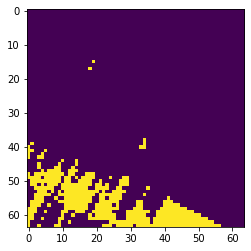

In [39]:
plt.imshow(generators.train_generator.next()[0][0])
print(generators.train_generator.next()[1][0])

<h1>CNN model</h1>

In [6]:
# Building our model 
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

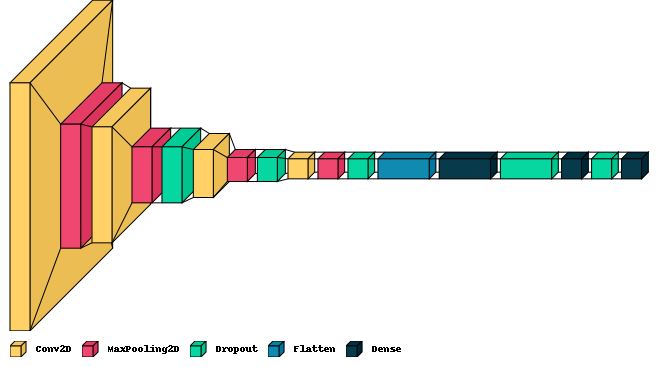

In [7]:
visualkeras.layered_view(model, legend=True)

In [43]:
# Compiling using adam and categorical crossentropy
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       7

In [45]:
# Fitting our CNN with 250 epochs and setting the results to history for visuals
history = model.fit(generators.train_generator,
                    validation_data=generators.test_generator,
                    epochs=15)

Epoch 1/15


2022-11-11 12:52:00.582991: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 503840768 exceeds 10% of free system memory.
2022-11-11 12:52:02.795287: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 125960192 exceeds 10% of free system memory.
2022-11-11 12:52:02.942055: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 220463104 exceeds 10% of free system memory.
2022-11-11 12:52:03.071802: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2022-11-11 12:52:03.089698: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.


14/14 [==============================] - 296s 21s/step - loss: 1.0606 - accuracy: 0.4429 - val_loss: 1.0783 - val_accuracy: 0.4070
Epoch 2/15
14/14 [==============================] - 135s 10s/step - loss: 0.8631 - accuracy: 0.5743 - val_loss: 0.7493 - val_accuracy: 0.6934
Epoch 3/15
14/14 [==============================] - 147s 11s/step - loss: 0.7663 - accuracy: 0.6237 - val_loss: 0.6609 - val_accuracy: 0.7049
Epoch 4/15
14/14 [==============================] - 44s 3s/step - loss: 0.7310 - accuracy: 0.6400 - val_loss: 0.5941 - val_accuracy: 0.7387
Epoch 5/15
14/14 [==============================] - 37s 3s/step - loss: 0.7227 - accuracy: 0.6410 - val_loss: 0.6667 - val_accuracy: 0.6957
Epoch 6/15
14/14 [==============================] - 37s 3s/step - loss: 0.7025 - accuracy: 0.6501 - val_loss: 0.6736 - val_accuracy: 0.6981
Epoch 7/15
14/14 [==============================] - 37s 3s/step - loss: 0.6899 - accuracy: 0.6563 - val_loss: 0.6245 - val_accuracy: 0.7312
Epoch 8/15
14/14 [=======

In [50]:
# Fitting our CNN with 250 epochs and setting the results to history for visuals
history = model.fit(generators.train_generator,
                    validation_data=generators.test_generator,
                    epochs=50)

Epoch 1/50
14/14 [==============================] - 43s 3s/step - loss: 0.4168 - accuracy: 0.8337 - val_loss: 0.3756 - val_accuracy: 0.8563
Epoch 2/50
14/14 [==============================] - 38s 3s/step - loss: 0.4082 - accuracy: 0.8400 - val_loss: 0.3678 - val_accuracy: 0.8624
Epoch 3/50
14/14 [==============================] - 36s 3s/step - loss: 0.4087 - accuracy: 0.8364 - val_loss: 0.4820 - val_accuracy: 0.8144
Epoch 4/50
14/14 [==============================] - 36s 3s/step - loss: 0.4143 - accuracy: 0.8333 - val_loss: 0.4483 - val_accuracy: 0.8354
Epoch 5/50
14/14 [==============================] - 37s 3s/step - loss: 0.4110 - accuracy: 0.8364 - val_loss: 0.3691 - val_accuracy: 0.8597
Epoch 6/50
14/14 [==============================] - 36s 3s/step - loss: 0.4123 - accuracy: 0.8349 - val_loss: 0.3286 - val_accuracy: 0.8749
Epoch 7/50
14/14 [==============================] - 36s 3s/step - loss: 0.4069 - accuracy: 0.8390 - val_loss: 0.5382 - val_accuracy: 0.8039
Epoch 8/50
14/14 [==

In [68]:
model.save("gender_classifier_v2.h5")

In [63]:
model = tf.keras.models.load_model("gender_classifier_v2.h5")

In [60]:

history = model.fit(generators.train_generator,
                    validation_data=generators.test_generator,
                    epochs=100)

Epoch 1/100
14/14 [==============================] - 38s 3s/step - loss: 0.3437 - accuracy: 0.8608 - val_loss: 0.3481 - val_accuracy: 0.8810
Epoch 2/100
14/14 [==============================] - 37s 3s/step - loss: 0.3383 - accuracy: 0.8637 - val_loss: 0.3081 - val_accuracy: 0.8878
Epoch 3/100
14/14 [==============================] - 37s 3s/step - loss: 0.3410 - accuracy: 0.8611 - val_loss: 0.2548 - val_accuracy: 0.9124
Epoch 4/100
14/14 [==============================] - 37s 3s/step - loss: 0.3487 - accuracy: 0.8608 - val_loss: 0.2391 - val_accuracy: 0.9155
Epoch 5/100
14/14 [==============================] - 37s 3s/step - loss: 0.3382 - accuracy: 0.8627 - val_loss: 0.3089 - val_accuracy: 0.8901
Epoch 6/100
14/14 [==============================] - 38s 3s/step - loss: 0.3418 - accuracy: 0.8645 - val_loss: 0.2895 - val_accuracy: 0.8932
Epoch 7/100
14/14 [==============================] - 38s 3s/step - loss: 0.3370 - accuracy: 0.8627 - val_loss: 0.3329 - val_accuracy: 0.8817
Epoch 8/100
1

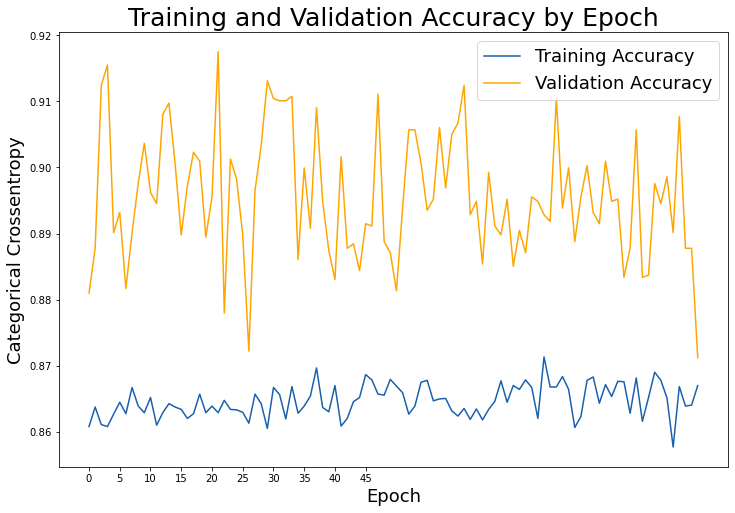

[0. 0. 1.]


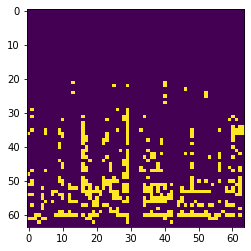

In [61]:

# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,50,5), range(0,50,5))

plt.legend(fontsize = 18)
plt.show();
plt.imshow(generators.test_generator.next()[0][0])
print(generators.test_generator.next()[1][0])

# Testing Accuracy

In [64]:
model.evaluate(generators.test_generator)

3/3 [==============================] - 4s 1s/step - loss: 0.2592 - accuracy: 0.9101


[0.2592245638370514, 0.9100743532180786]

In [42]:
preds = model.predict(generators.test_generator)

3/3 [==============================] - 4s 1s/step


In [43]:
test_data.head()

,Image,Label
0,test_images/noise/191382-3-1-0.jpg,N
1,test_images/noise/65381-3-0-6.jpg,N
2,test_images/females/1717.jpg,F
3,test_images/noise/23219-5-0-6.jpg,N
4,test_images/noise/35548-9-2-9.jpg,N


In [44]:
generators.test_generator.next()[1][0]

array([0., 0., 1.], dtype=float32)

In [45]:
preds

array([[1.2052179e-01, 6.0175672e-02, 8.1930256e-01],
       [4.4956163e-02, 8.5240304e-02, 8.6980355e-01],
       [9.8453742e-01, 1.5455143e-02, 7.4130430e-06],
       ...,
       [7.5898135e-01, 2.4015200e-01, 8.6659129e-04],
       [9.9794916e-04, 4.4541755e-03, 9.9454790e-01],
       [9.5079947e-01, 4.9199227e-02, 1.3972992e-06]], dtype=float32)

In [46]:
# Saving the dataframe to use with our Dense NN to use as a voting classifier 
predic_cnn = pd.DataFrame(preds)

predic_cnn.to_csv('predict_cnn.csv', index=False)

<h1> TESTING MIC REAL TIME</h1>

In [ ]:
# with open("microphone-results.wav", "wb") as f:
#     f.write(audio.get_wav_data())

In [138]:
"""PyAudio example: Record a few seconds of audio and save to a WAVE file."""

import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
Jac

* recording
* done recording


In [115]:
# Randomly choosing one of the audio files
filename = "output.wav"

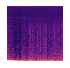

In [139]:
# Randomly choosing one of the audio files
filename = "output.wav"
# Checking how the image looks like with the frequency restriction
X, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
# Setting the size of the image
fig = plt.figure(figsize=[1, 1])
# This is to get rid of the axes and only get the picture
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
plt.savefig("output.jpg", dpi=500, bbox_inches='tight',pad_inches=0)


(64, 64, 3)


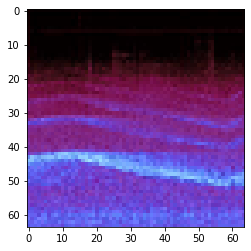

In [147]:
img = cv2.resize(cv2.imread("0.jpg"), (64,64))
plt.imshow(img)
print(img.shape)

In [148]:
image = pre_gen_binarize(img)

In [149]:
image.shape

(64, 64, 1)

In [150]:
image_input = np.array([image])

In [151]:
pred = model.predict(image_input)

1/1 [==============================] - 0s 19ms/step


In [152]:
pred

array([[0.00162176, 0.00372632, 0.9946519 ]], dtype=float32)

# Confusion Metrics

In [156]:
y_pred = model.predict(generators.test_generator)

3/3 [==============================] - 4s 1s/step


In [157]:
y_obs = np.argmax(y_pred, axis=1)
y_true = generators.test_generator.classes

Test Accuracy:  0.9100743745774171


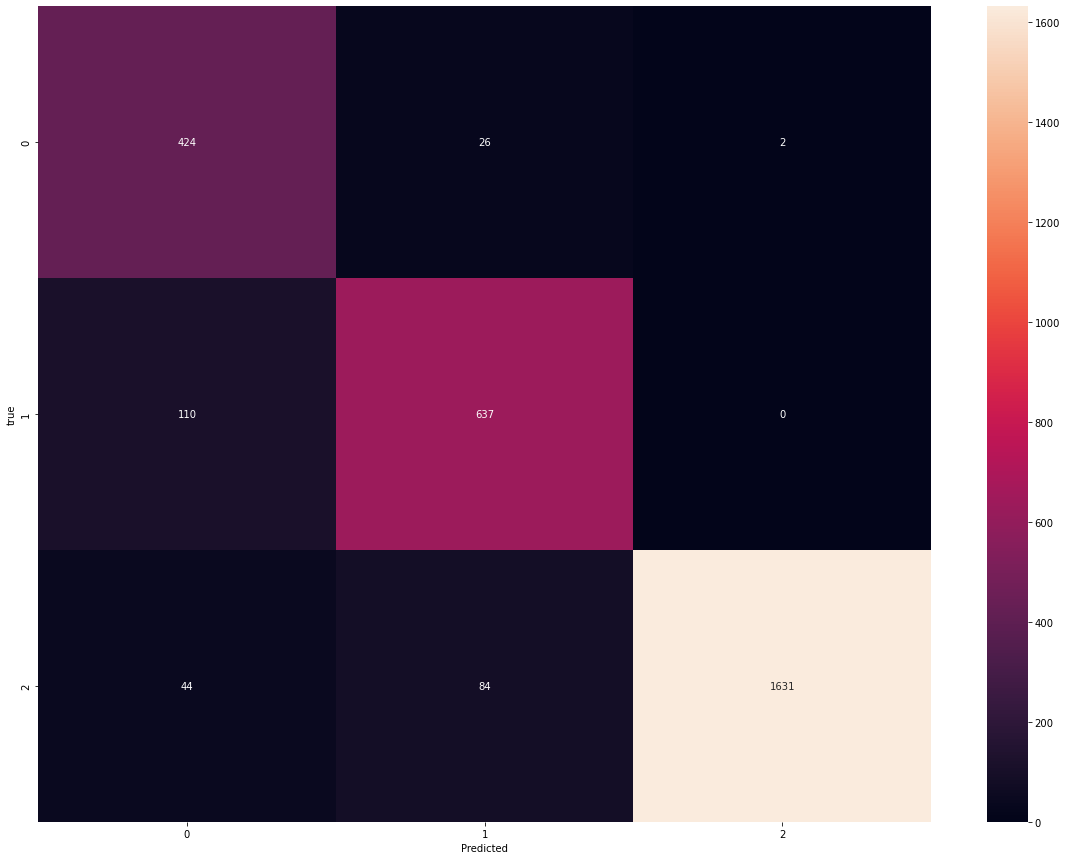

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
test_acc = accuracy_score(y_true, y_obs)
cm = confusion_matrix(y_true, y_obs)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()